In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
from scipy.stats import gamma
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor as GP
from sklearn.gaussian_process import kernels

import my_plotting as mp

%matplotlib inline

In [163]:
def instantiate_and_evaluate_gp(nsamples: int, local_var: np.ndarray, num_of_lines: int, line_index: int) -> np.ndarray:
    xs = []
    lambs = []
    count = 0
    lambs = gamma.rvs(a=5, scale=1, random_state=0, size=nsamples)
    # kernel = (1 / lamb) * kernels.Matern(length_scale=2, nu=1.9)
    kernel = (1 / lambs[0]) * kernels.RBF(length_scale=2)
    gp = GP(kernel=kernel)
    while count < nsamples:
        lamb = lambs[count]
        gp.set_params(**{'kernel__k1': kernels.ConstantKernel(constant_value=1/lamb)})
        gp_samples = gp.sample_y(local_var.reshape(-1,1), n_samples=num_of_lines).T[line_index]
        xs.append(gp_samples)
        count += 1
        
    return np.array([norm.cdf(x) for x in xs]), np.array(lambs)
    # return np.array([x for x in xs]), np.array(lambs)

In [176]:
local_var = np.linspace(-10, 10, 1000)

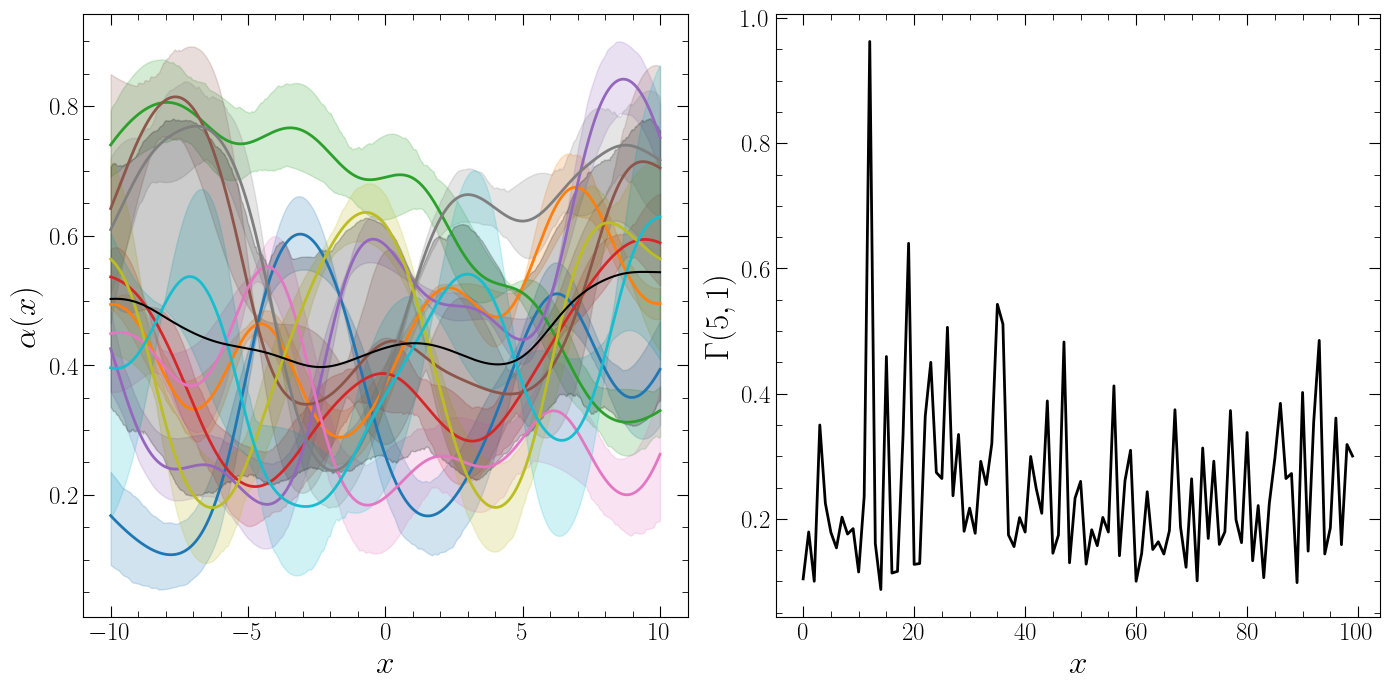

In [177]:
fig, ax = plt.subplots(ncols=2, figsize=(2 * 7, 7))
fig.patch.set_facecolor('white')

num_of_lines = 10
cmap = mp.get_cmap(n=10, name='tab10')
sampled_gps = []
for i in range(num_of_lines):
    samples, lambs = instantiate_and_evaluate_gp(
        nsamples=100,
        local_var=local_var,
        num_of_lines=num_of_lines,
        line_index=i
    )
    mean = np.mean(samples, axis=0)
    credible_interval = np.quantile(
        q=[0.16, 0.84],
        a=samples,
        axis=0
    )
    ax[0].plot(local_var, mean, lw=2, color=cmap(i))
    ax[0].fill_between(local_var, credible_interval[0], credible_interval[1], color=cmap(i), alpha=0.2)
    
    sampled_gps.append(samples)
    
sampled_gps = np.array(sampled_gps).reshape(-1, local_var.size)
ax[0].plot(local_var, np.mean(sampled_gps, axis=0), color='black')
ax[0].fill_between(local_var, *np.quantile(q=[0.16, 0.84], a=sampled_gps, axis=0), color='black', alpha=0.2)
mp.costumize_axis(ax[0], r'$x$', r'$\alpha(x)$')

ax[1].plot(1 / lambs, color='black', lw=2)
mp.costumize_axis(ax[1], r'$x$', r'$\Gamma(5, 1)$')

fig.tight_layout()

In [111]:
local_var = np.linspace(-10, 10, 1000)

In [ ]:
samples, lambs = instantiate_and_evaluate_gp(nsamples=100, local_var=local_var)
print(samples.shape)
mean = np.mean(samples, axis=0)
print(mean.shape)
credible_interval = np.quantile(
    q=[0.025, 0.975],
    a=samples,
    axis=0
)
print(credible_interval[0].shape)

(100, 1000)
(1000,)
(1000,)


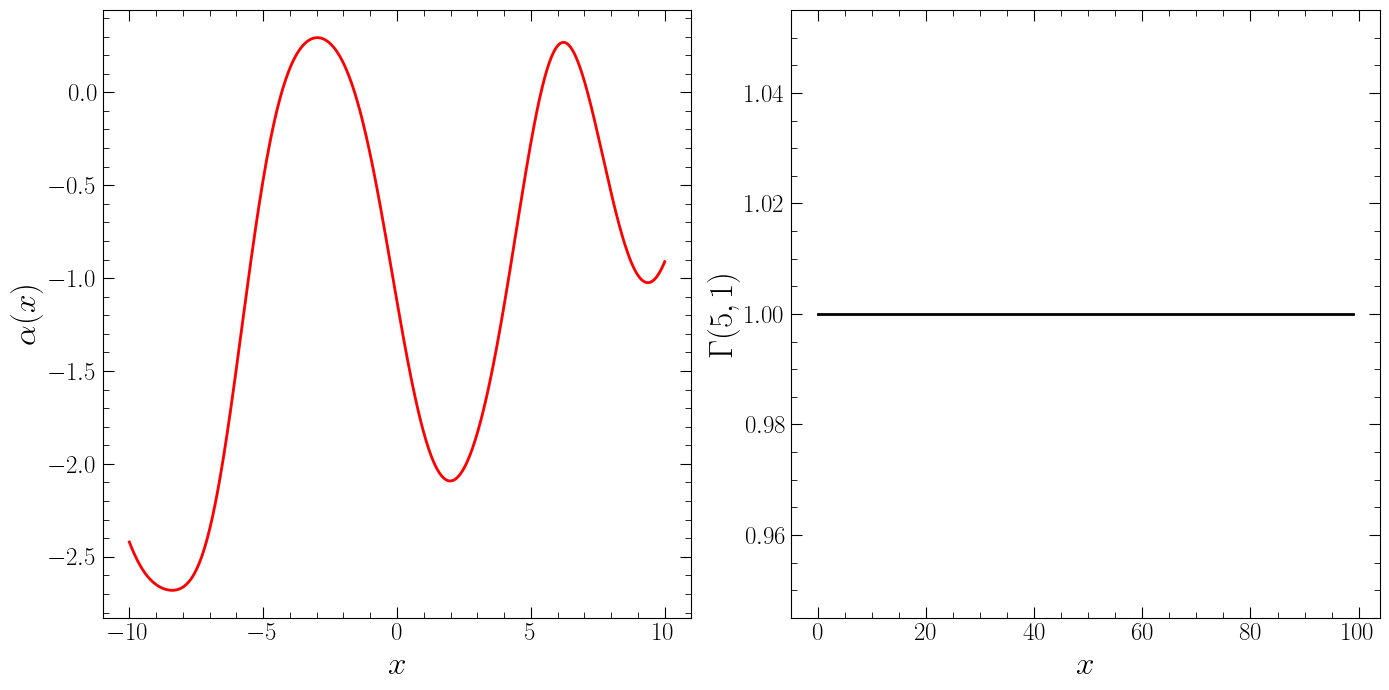

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(2 * 7, 7))
fig.patch.set_facecolor('white')

ax[0].plot(local_var, mean, lw=2, color='red')
ax[0].fill_between(local_var, credible_interval[0], credible_interval[1], color='red', alpha=0.2)
mp.costumize_axis(ax[0], r'$x$', r'$\alpha(x)$')

ax[1].plot(1 / lambs, color='black', lw=2)
mp.costumize_axis(ax[1], r'$x$', r'$\Gamma(5, 1)$')

fig.tight_layout()

# Testing grounds

<AxesSubplot: xlabel='$x$', ylabel='$\\mathcal{GP}(x)$'>

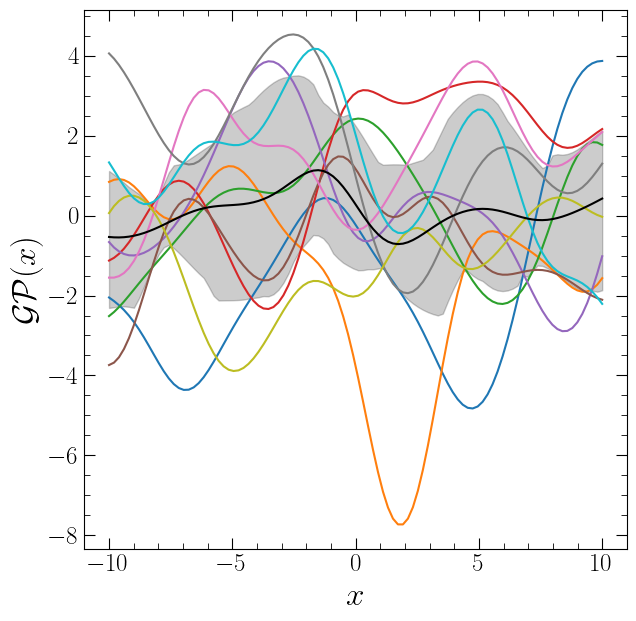

In [133]:
local_var = np.linspace(-10, 10, 100)
kernel = (1 / .25) * kernels.RBF(length_scale=2)
gp = GP(kernel=kernel)

fig, ax = plt.subplots(figsize=(7,7))
fig.patch.set_facecolor('white')
nsamples = 10
samples = gp.sample_y(local_var.reshape(-1,1), n_samples=nsamples)
for n in range(nsamples):
    ax.plot(local_var, samples.T[n])
ax.plot(local_var, np.mean(samples.T, 0), color='black')
ax.fill_between(local_var, *np.quantile(q=[0.16, 0.84], a=samples.T, axis=0), color='black', alpha=0.2)
mp.costumize_axis(ax, r'$x$', r'$\mathcal{GP}(x)$')

In [ ]:
type(gp.kernel.k1)
params = {'kernel__k1': kernels.ConstantKernel(constant_value=9)}
gp.set_params(**params)

GaussianProcessRegressor(kernel=3**2 * RBF(length_scale=2))

In [ ]:
gp.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__k1': 3**2,
 'kernel__k2': RBF(length_scale=2),
 'kernel__k1__constant_value': 9,
 'kernel__k1__constant_value_bounds': (1e-05, 100000.0),
 'kernel__k2__length_scale': 2,
 'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
 'kernel': 3**2 * RBF(length_scale=2),
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [123]:
samples.shape

(100, 10)

In [172]:
np.mean(np.array(sampled_gps).reshape(-1, 100), axis=0)

array([0.45017812, 0.44957623, 0.44947495, 0.4499799 , 0.45120653,
       0.45326273, 0.45622715, 0.46012649, 0.46491642, 0.47047184,
       0.47659207, 0.48302306, 0.48949303, 0.49575207, 0.50160341,
       0.50691716, 0.51162496, 0.51570153, 0.51914359, 0.52195498,
       0.52414207, 0.52571871, 0.5267171 , 0.52720028, 0.52727216,
       0.52708136, 0.52681684, 0.5266957 , 0.52694556, 0.52778558,
       0.5294089 , 0.53196824, 0.53556457, 0.54023804, 0.54595967,
       0.55262214, 0.56002861, 0.56788047, 0.57576818, 0.58317343,
       0.58949297, 0.59409056, 0.59637308, 0.59587348, 0.59231785,
       0.58566064, 0.57608879, 0.56400679, 0.5500132 , 0.53486681,
       0.51943118, 0.50459084, 0.49114917, 0.47973347, 0.47073338,
       0.4642855 , 0.46030067, 0.45851915, 0.45857691, 0.46006952,
       0.46260587, 0.46584924, 0.46954518, 0.47353456, 0.47774749,
       0.48217433, 0.48681614, 0.49162883, 0.4964855 , 0.50117859,
       0.50546256, 0.50911279, 0.5119684 , 0.51394288, 0.51500